# Two-armed Bernoulli Bandits...

* Credits: Andrea Mazzolini, Alberto Pezzotta*

In the standard "two-armed Bernoulli Bandits" we can pull one of the two arms of a bandit (slot-machine) $a\in \lbrace 1,2 \rbrace$. Both the arms provide a Bernoulli-distributed reward: $r = 1$ with probability $q_i$, $r = 0$ with $1-q_i$, where $i \in \lbrace 1,2 \rbrace$.

<div>
<img src="attachment:Bandits.PNG" width="400">
</div>

In the most general case, there is a whole 2D space of possible bandits.
Each point correspond to a single state, that is a single realization of the two-bandits above.

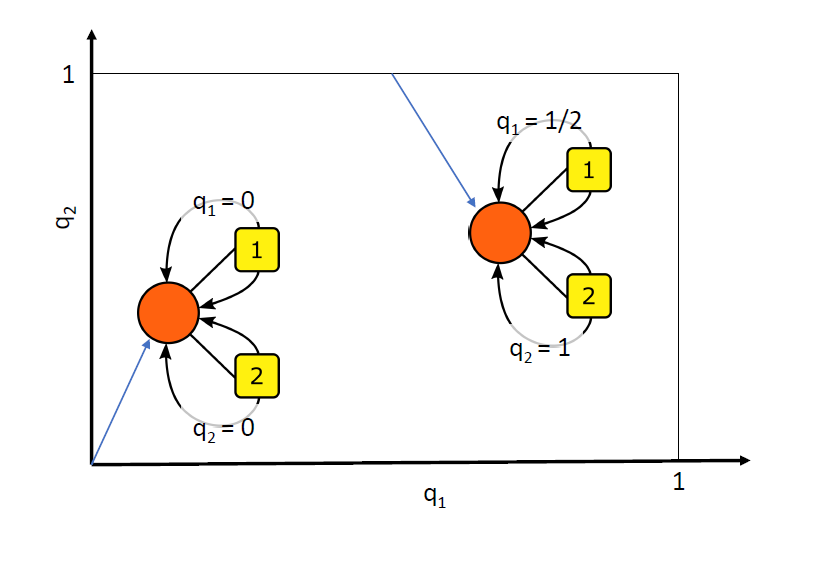

Solving each problem is trivial: we just use the arm with larger success probability.

# ... as a partial Observable MDP. 

Let us assume that we have only _partial_ information over the system.
What we do know? We know the **model**:

- **Known:** Given a state $(q_1, q_2)$ the rewards ($r \in \{0,1\}$) are Bernoulli-distributed. 
1. $p(r \,|\, s=(q_1, q_2), a=1) = q_1^r \, (1-q_1)^{1-r} \,/ \,A$ 
2. $p(r \,|\, s=(q_1, q_2), a=2) = q_2^r \, (1-q_2)^{1-r} \,/ \,A$

- **Known:** The transition probability from states is trivial: there are no transitions.  $p(s' | s, a) = \mathbb{1} (s' = s)$

- **Known:** The outcomes of the actions (=observations). Model for the observation, which is the Bernoulli distribution.



- _**Unknown:** The state! The two probabilities are "hidden"._

We have to shift our focus from the idea of the state $(q_1, q_2)$ to the idea of _beliefs_ over the state, i.e. probability distributions over the states $P(q_1, q_1)$.

__What is a belief b(s)?__
__The distribution of probabilities over the states.__


$s=(q_1,q_2) \rightarrow b(s) = P(q_1, q_2)$




![alt text](belief.png "Typical belief")

Notice that now we can re-define the system in terms of the beliefs. For example:

$p(r \, | \, b(s), a) = \int \, \text{d}s \, b(s) \, p(r \, | \, s, a)$
    

$p(r \, | \, b(q_1, q_2), 1) = \int \, \text{d}q_1 \, \text{d}q_2 \, P(q_1, q_2) \,q_1^r \, (1-q_1)^{1-r}$

# -------------------------------------

# How can we use our _belief_ of the state?

In general they can mix two strategies: *exploration*, and *exploitation*.

__*Exploration:*__ They can do random actions, just to __make their beliefs better__.

__*Exploitation:*__ They can do the __best action given their current belief__. (But They could be wrong).

Too much exploration -> I use the "wrong" arm too often.
Too much exploitation -> I may be mistaken on what is the "best" arm.

In the following we provide a *dynamic-programming algorithm* which, under few assumption, provide the best strategy to adopt in this exploration-exploitation dilemma.


# Belief updating: Bayes.

Every time that we pull an arm, we have new information (the reward!). How does this information changes our belief?

_The two arms are independent_, so for semplicity let us just consider only one arm. What are our ingredients?
- We know the probability of the success $r$ given a state $q$ (which *we do not know*). (called _likelyhood_)

$p( r| q) = q^r (1-q)^{(1-r)}$
- We know the current belief $b(q)$ (also called *prior*)

How can we modify our belief after an observation? Enters: *the Bayes rule*. 

$b'(q|r) = {p(r | q) \,\,\, b(q)} \,\,\,\,/ {\int dq b(q)}$ 

$b'(q|r) = {q^r (1-q)^{(1-r)} \,\,\, b(q)} \,\,\,\, / {\int dq b(q)}$ 


Where now $b'(q|r)$ (also called *posterior*) is the updated belief given the outcome $r$.


# What is the space of the belief?

In principle, the belief space is made by *all positive function that sum up to 1*. Fortunately, we are in one of those special cases where we need only to focus on a special subspace.

- Since the likelyhood is Bernoulli, if our prior is a Beta distribution, then the posterior will stay a Beta distribution.

$b(q) = Beta(q | \alpha, \beta) = q ^{\alpha -1} (1-q)^{\beta -1}  \,\,\,\, / \mathcal{C}$

Let's check what happens when I update with an outcome of success: $r = 1$:

$b(q) = Beta(q |\alpha, \beta)$

$b'(q|r=1) = q^1 (1-q)^0 \,\,\,\,\, q ^{\alpha -1} (1-q)^{\beta -1} \,\,\,\,\, / \mathcal{C}$

$b'(q|r=1) = q ^{(\alpha + 1) -1} (1-q)^{\beta -1} \,\,\,\,\, / \mathcal{C}'$

$b'(q|r=1) = Beta(q | \alpha+1, \beta)$

(- We **need** to assume to start from a Beta distribution. Fortunately, the **complete ignorance** is a Beta distribution!: $b(s) = P(q_1, q_2) = 1 = Beta(q_1 | \alpha_1=1,\beta_1=1) Beta(q_2 | \alpha_2=1,\beta_2=1)$ is made by Beta distributions.)



In [15]:
from scipy.stats import beta
import numpy as np
import matplotlib.pyplot as plt

def plot_belief_state(a1,b1,a2,b2):
    
    # pdf = probability density function
    belief_q1 = beta(a1, b1).pdf
    belief_q2 = beta(a2, b2).pdf

    Nbin = 100
    x = y = np.linspace(0, 1, Nbin)
    xx, yy = np.meshgrid(x, y)
    # belief value for a (x,y) = (q_1, q_2)
    z = belief_q1(xx)*belief_q2(yy)
    print(z)
    Z = z.reshape(Nbin, Nbin)[::-1,:]
    extent = [0, 1, 0, 1]
    plt.xlabel('q_1')
    plt.ylabel('q_2')
    plt.imshow(Z, extent=extent)

    plt.show()
    return


[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


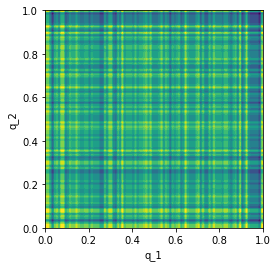

In [16]:
# Total ignorance!
# b(s)      =Beta(alpha1, beta1, alpha2, beta2)
plot_belief_state(1,          1,      1,     1)

# I pull arm 1, and I get a success. 
# Q: What is the update?



# Much better now.

This belief contains our current knowledge about the problem and we want to use it at the best that we can.

The Bayes' rule for the belief update translates into the following one for the hyper-parameters (see the pdf notes..):

$$
    \begin{aligned}
        (\alpha^1,\,\beta^1,\,\alpha^2,\,\beta^2) \mapsto 
            & \mathbb{I}(a_t=1)\,\Big[ \mathbb{I}(r_{t+1}=1)\,\big( \alpha^1+1,\,\beta^1,\,\alpha^2,\,\beta^2\big) + \mathbb{I}(r_{t+1}=0)\,\big( \alpha^1,\,\beta^1+1,\,\alpha^2,\,\beta^2\big) \Big] \\
            + & \mathbb{I}(a_t=2)\,\Big[ \mathbb{I}(r_{t+1}=1)\,\big( \alpha^1,\,\beta^1,\,\alpha^2+1,\,\beta^2\big) + \mathbb{I}(r_{t+1}=0)\,\big( \alpha^1,\,\beta^1,\,\alpha^2,\,\beta^2+1\big) \Big] \\
    \end{aligned}
$$

where $\mathbb{I}(x)$ is the indicator function, which is one if the condition $x$ is true, $0$ if false.

Choosing an uniform initial prior, the corresponding hyperparameters are $\alpha^i_0 = \beta^i_0 = 1$.
By combining this assumption and the update rule above, one finds that the hyperparameters at time $t$ can be rewritten in terms of the number of wins, $n_i$, and losses, $m_i$:
$$
    \alpha^i_t = n_i + 1 \quad \mbox{and} \quad \beta^i_t = m_i + 1 \ .
$$


## (Belief from a frequentist point of view.)

Let us take "infinite" couples $(q_1, q_2)$ randomly choosen from the whole $[0,1]\times [0,1]$ space, and make random pulls from one or from the other arm, collecting their history or results $h_[0, t]$.

Then we can select _all_ whose history is such that they have $n_1/m_1$ successes/fails on arm 1, $n2/m2$ successes/fails on arm 2. They are distributed following the $Beta(n_1+1, m_1+1, n_2+1, m_2+1)$

Notice that if the starting distribution changes (corresponding to the prior, or $b_0(s)$), the equivalence is lost!

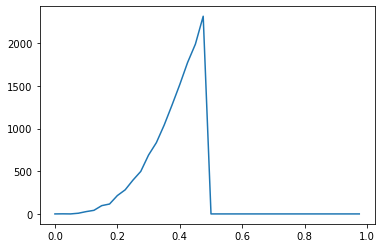

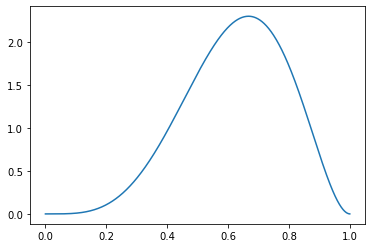

In [17]:
from scipy.stats import beta
import numpy as np
import matplotlib.pyplot as plt
T = 6
q_list = np.empty(0)

for i in range(200000):
    # This is the "meaning" of total ignorance.
    q = np.random.rand()*0.5
    
    # This is the "empirical" history of just one trajectory
    history = np.random.choice(2,size=T, p=[1-q,q])
    
    # This is the sufficient statistics
    n1 = np.sum(history)
    m1 = T - n1
    
    # I am only interested in the "trajectories" which cross the point (alpha=4+1, beta=2+1)
    if n1==4:
        q_list = np.append(q_list, q)

bins=40
histo, _ = np.histogram(q_list, range=(0,1), bins=bins)
belief_q = beta(4+1, 2+1).pdf

# histogram
plt.plot(np.arange(0.0,1.0,1/bins), histo)
plt.show()

plt.plot(np.arange(0.0,1.0,0.001), belief_q(np.arange(0.0,1.0,0.001)))
plt.show()


# Q: What happens if my prior is NOT complete ignorance?
# Q: Are n1, m1 really the history of the arms pulling?



## The MDP in beliefs' space

### New state: a compact description for the belief.

This observation can be used to cast the Partially Observable bandit problem into a standard MDP, where the state space is defined by the hyperparameters of the beliefs: $b_t = (n_1,m_1,n_2,m_2)$. $b_t \in \mathbb{Z}^4$

(Achtung! The _new states_ ($b$) are the beliefs over the _old states_ ($s$).)

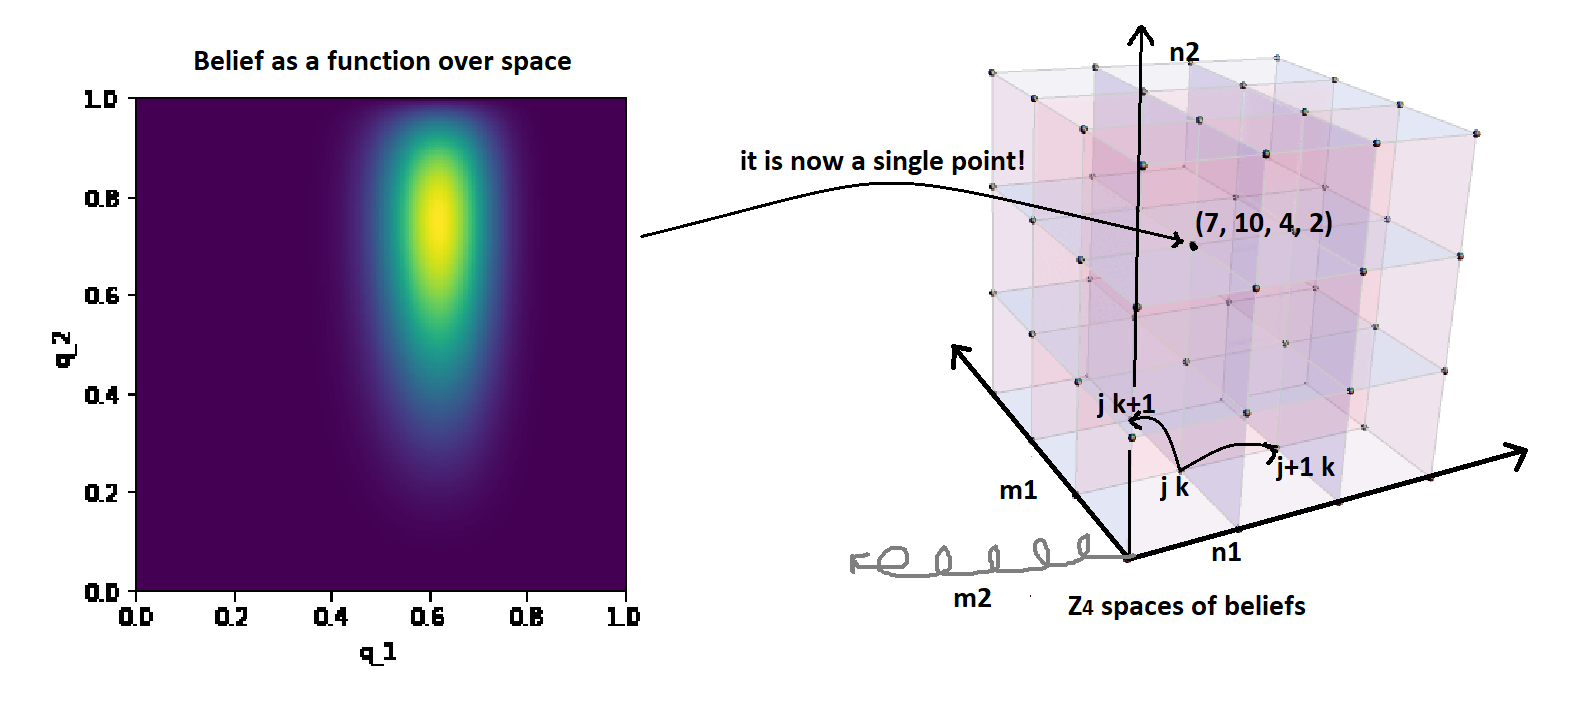

### New transition: one-step jump.
Specifically, the transition to new beliefs are given by the following rule:
$$
    b_{t+1} = \left\{
    \begin{array}{cl}
        (n_1+1,\,m_1,\,n_2,\,m_2)  & \qquad \mbox{w.p. } \ p(b_{t+1}| a_t=1, b_t) = \dfrac{n_1+1}{n_1+m_1+2} \\[2ex]
        (n_1,\,m_1+1,\,n_2,\,m_2)  & \qquad \mbox{w.p. } \ p(b_{t+1}| a_t=1, b_t) = \dfrac{m_1+1}{n_1+m_1+2} \\[2ex]
        (n_1,\,m_1,\,n_2+1,\,m_2)  & \qquad \mbox{w.p. } \  p(b_{t+1}| a_t=2, b_t) = \dfrac{n_2+1}{n_2+m_2+2} \\[2ex]
        (n_1,\,m_1,\,n_2,\,m_2+1)  & \qquad \mbox{w.p. } \  p(b_{t+1}| a_t=2, b_t) = \dfrac{m_2+1}{n_2+m_2+2} \\[2ex]
    \end{array}
    \right.
$$




In words, the game moves from a given configuration of counters to a new one according to a transition probability which is my best guess of winning or loosing (determined by my belief).
Note that this probability is also affected by the initial prior. Its derivation is shown in the pdf notes.

### New rewards.
The reward can be expressed as a function of $b_t$ and $b_{t+1}$. It reflects the fact that the agent gets $r=1$ only if a counter associated to a winning event increases:
$$
    r_t = r(b_{t+1}, b_t) = \mathbb{I}\big(b_{t+1} = b_t\big|_{n_1 \mapsto n_1 + 1}\big) + \mathbb{I}\big(b_{t+1} = b_t\big|_{n_2 \mapsto n_2 + 1}\big)
$$

States(our beliefs), actions, transition probabilities and rewards described above define a Markov Decision Process which can now be solved through the Bellman optimality equation.


# We have now our MDP (in beliefs). Let us solve it.

The goal of the agent is then to find the policy $\pi(a)$ (probability of choosing one of the two arms) that maximizes an exponentially discounted return:
$$
    V_\pi(b) = \mathbb{E}_\pi\bigg[ \sum_{t=0}^\infty \gamma^t\,r_t \Big| b_0 = b \bigg] \ .
$$
which considers the summation of all the rewards that I will take form the present time to the future (in a game played infinitely many times) discounted by a factor $\gamma \in [0,1)$ which exponentially suppresses the importance that I give to future rewards.
The discount factor can be equivalently interpreted as the continuing probability of the game. In this latter interpretation the players wants to maximise the non-discounted rewards over the finite number of episodes that they will play.

The optimality equation provides a way to compute the best return that I can expect from a given belief $V^*(b)$ as follows:

$$
V^*(b) = \max_{a\in\{1,2\}} \sum_{b'} p(b'|b,a)\big[ r(b',b) + \gamma\,V^*(b') \big]
$$

It also gives the best action that can be taken (the best policy is deterministic):
$$
    a^*(b_t) = {\rm argmax}_{a\in\{1,2\}} Q^*(b_t,a)
$$
where $Q^*$ is the optimal quality function
$$
    Q^*(b,a) = \sum_{b'} p(b'|b,a)\big[ r(b',b) + \gamma\,V^*(b') \big]
$$

In conclusion, $a^*(b)$ says which is the best arm to pull to optimize the discounted return, by having a current belief described by $b = (n_1,m_1,n_2,m_2)$.

## The state space of the hyperparameters is infinite!

Before presenting the algorithm to solve the Belmann equation it is important to note that a belief is defined by the value of each hyperparameter, which is an integer going from $0$ to $\infty$. (Recall that transitions happen only towards increasing values!)

This clearly does not allow for a direct implementation of standard algorithms for tabular MDPs such as dynamic programming (the one considered here).

To find an approximate MDP with a finite state space we can note that the discount factor $\gamma$ (which appears in the exponentially discounted return) introduces a time scale, since one can interpret it as the probability of continuing the game after each step.
In particular the quantity $1/(1-\gamma)$, i.e. the **time horizon**, is the number of time steps that the player expects to play (on average).
Therefore, it is very unlikely that the game can last for a time much greater than the time horizon. 

In order to find a more quantitative rule to fix the boundary of the state space, one can consider the probability that the game lasts for more that $T$ steps: $P(t>T) = \gamma^T$.
If $T$ is chosen such that this probability is small: $P(t>T) = \epsilon$, one finds:

$$
T = \log{\epsilon} \; / \; \log{\gamma}
$$

If we define se sub set of beliefs:

$$
B(t) = \lbrace  b = (n_1,m_1,n_2,m_2) \;\; \text{such that} \;\; n_1 +m_1 + n_2 + m_2 = t \rbrace 
$$

A good approximation of the belief space is to consider $\mathcal{B} = \bigcup_{t<T} B(t)$, since the summation of the four counters increases of $1$ at each step.


## Finding the optimal strategy using the backward propagation of the values

A very efficient dyniamic programming algorithm that can be applied in this case exploits the following property of the Bellman equation:

$$
V^*(b) |_{b\in B(t)} = \max_{a\in\{1,2\}} \sum_{b' \in B(t+1)} p(b'|b,a)\big[ r(b',b) + \gamma\,V^*(b') \big] = B(V^*(b))|_{b\in B(t+1)} 
$$

which basically says that to compute the values of a state in $B(t)$ one needs to know only the values of the states in $B(t+1)$. This comes from the fact that a transition from a state whose sum of counters is $t$ leads always to a state in which only one of the counters is increased by one unit, and therefore belongs to $B(t+1)$.

As a consequence if one knows the values at $B(T)$ (the boundary of the approximated state space) all the other values can be iteratively computed going backward.

This can seem useless since we do not know those values at the boundary.
However, if one tries to estimate them, and "backpropagate" this estimate, one realizes that the error of such estimates will be negligible far away from the boundary.
Indeed, looking at the optimality equation in its eyes, one can see that the order of this error for the values of $B(t)$ is $\gamma^{T-t}$.

## Optimal strategy is UNIQUE in the space of beliefs.

- The **strategy** is irrespective to the actual values of $q_1$ and $q_2$
- The **trajectories** will depend on the actual values of $q_1$ and $q_2$

## Implementing backward recursion of the value

In [18]:
import numpy as np
import matplotlib.pyplot as plt

eps = 1e-1 # Precision of the approximation
gamma = 0.9 # Discount factor

T = int( np.log(eps) / np.log(gamma) )
print("Temporal steps after which the probability of continuing the game is {}: {}".format(eps, T))

Temporal steps after which the probability of continuing the game is 0.1: 21


It is useful to introduce a way to enumerate all states $S(t)$:

In [19]:
def enumerate_state_at_time(time):
    states = []
    for n1 in range(time+1):
        for m1 in range(time-n1+1):
            for n2 in range(time-n1-m1+1):
                m2 = time - n1 - m1 - n2
                states.append((n1, m1, n2, m2))
    return states

enumerate_state_at_time(2)

[(0, 0, 0, 2),
 (0, 0, 1, 1),
 (0, 0, 2, 0),
 (0, 1, 0, 1),
 (0, 1, 1, 0),
 (0, 2, 0, 0),
 (1, 0, 0, 1),
 (1, 0, 1, 0),
 (1, 1, 0, 0),
 (2, 0, 0, 0)]

Then, we need to choose how to estimate the value of the states at the boundary, i.e. $B(T)$.

__CORRECTED__
A reasonable choice can be to consider the belief on the boundary as "fixed". Then the optimal policy is to simply choose the maximum between the average reward of the two arms: $ q_{best} = \max_i \{ q_i = (n_i+1)/(n_i+m_i+2)\}$. The resulting value is $V^*(b) |_{b\in B(t)} =  q_{best} + \gamma V^*(b) = \frac{q_{best}}{1-\gamma} $.


In [20]:
values = dict() # The value is a dictionary (n1,m1,n2,m2) -> value
best_actions = dict() # This is a dictionary (n1,m1,n2,m2) -> {1,2}

# Initializing all the values at the boundary
for boundary_state in enumerate_state_at_time(T):
    q1 = (boundary_state[0] + 1) / (boundary_state[0] + boundary_state[1] + 2)
    q2 = (boundary_state[2] + 1) / (boundary_state[2] + boundary_state[3] + 2)
    values[boundary_state] = max(q1, q2) / (1 - gamma)
    best_actions[boundary_state] = np.argmax((q1,q2))+1

The next step is to iteratively propagate the values from the states $B(t+1)$ to $B(t)$ using directly the Bellman equation.

In [21]:
# This computes the values of a "state" in B(t) by knowing the "values" of the states in B(t+1)
def compute_value(state, values):
    p1_win = (state[0] + 1) / (state[0] + state[1] + 2)
    p2_win = (state[2] + 1) / (state[2] + state[3] + 2)
    quality1 = p1_win * (1 + gamma * values[(state[0]+1, state[1], state[2], state[3])]) + \
                (1-p1_win) * gamma * values[(state[0], state[1]+1, state[2], state[3])]
    quality2 = p2_win * (1 + gamma * values[(state[0], state[1], state[2]+1, state[3])]) + \
                (1-p2_win) * gamma * values[(state[0], state[1], state[2], state[3]+1)]
    return max(quality1, quality2), np.argmax((quality1, quality2))+1

# From the boundary B(T) going backward..
for t in range(T)[::-1]:
    # ..get B(t)..
    states = enumerate_state_at_time(t)

    # ..for all s in B(t) compute the value and the best action
    for state in states:
        val, best_a = compute_value(state, values)
        values[(state)] = val
        best_actions[(state)] = best_a

## Plotting the solution

In [22]:
n2, m2 = (5,5)
# Q: What does it mean in terms of actual results for arm 2?

# Building a matrix of values and best actions masked outside the domain
values_mat = -np.ones((T, T))
best_a_mat = -np.ones((T, T))
for n in range(T):
    for m in range(T):
        if n+m+n2+m2 <= T:
            values_mat[n,m] = values[(n,m,n2,m2)]
            best_a_mat[n,m] = best_actions[(n,m,n2,m2)]
values_mat = np.ma.masked_where(values_mat==-1, values_mat)
best_a_mat = np.ma.masked_where(values_mat==-1, best_a_mat)
print(best_a_mat)

0 0 5.872631424232679 1
0 1 5.068477404909309 2
0 2 5.002265011197005 2
0 3 5.000000000000002 2
0 4 5.000000000000002 2
0 5 5.000000000000002 2
0 6 5.000000000000002 2
0 7 5.000000000000002 2
0 8 5.000000000000002 2
0 9 5.000000000000002 2
0 10 5.000000000000002 2
0 11 5.000000000000001 2
1 0 6.870703537829977 1
1 1 5.580420304878476 1
1 2 5.102166262571606 2
1 3 5.012148134696187 2
1 4 5.000000000000002 2
1 5 5.000000000000002 2
1 6 5.000000000000002 2
1 7 5.000000000000002 2
1 8 5.000000000000002 2
1 9 5.000000000000002 2
1 10 5.000000000000001 2
2 0 7.549851299499613 1
2 1 6.187656637158343 1
2 2 5.43940781155095 1
2 3 5.105427198051949 2
2 4 5.014194471153848 2
2 5 5.000000000000002 2
2 6 5.000000000000002 2
2 7 5.000000000000002 2
2 8 5.000000000000002 2
2 9 5.000000000000001 2
3 0 8.011301564650351 1
3 1 6.721240416666666 1
3 2 5.871034605394607 1
3 3 5.346882167832169 1
3 4 5.095807692307694 2
3 5 5.014160839160841 2
3 6 5.000000000000002 2
3 7 5.000000000000002 2
3 8 5.00000000

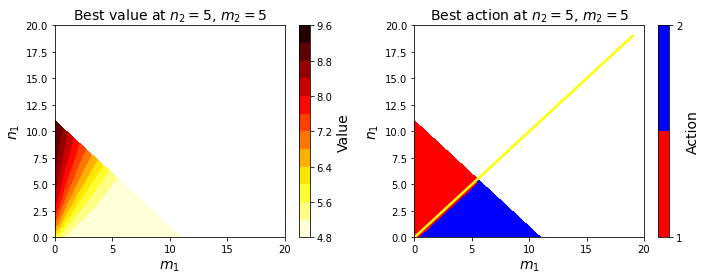

In [23]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

ax1.set_title('Best value at $n_2=${}, $m_2=${}'.format(n2,m2), fontsize=14)
ax1.set_xlabel('$m_1$', fontsize=14)
ax1.set_ylabel('$n_1$', fontsize=14)
im = ax1.contourf(values_mat, cmap='hot_r', levels=10)
bar = fig.colorbar(im, ax=ax1)
bar.set_label('Value', fontsize=14)

ax2.set_title('Best action at $n_2=${}, $m_2=${}'.format(n2,m2), fontsize=14)
ax2.set_xlabel('$m_1$', fontsize=14)
ax2.set_ylabel('$n_1$', fontsize=14)
cs = ax2.contourf(best_a_mat, levels=1, colors=['r','b'])
bar = fig.colorbar(cs, ax=ax2)
bar.set_label('Action', fontsize=14)
bar.set_ticks([1,2])


x = np.arange(20)
y = np.arange(20)
ax2.plot(x,y, linewidth=2.5, c="yellow")

plt.tight_layout()
plt.gcf().set_facecolor('white')
#plt.savefig('plot_{}.png'.format(gamma), dpi=200)

**Q:** Look at plot above:
- (Why most data points are white?)
- What is our belief of $q_2$?
- What are action 2 and 1 asymmetric in the right plot? What is the meaning for the blue excess?
- Why is value decreasing towards high numbers?

In [24]:
from scipy.stats import beta
import numpy as np
import matplotlib.pyplot as plt

def plot_belief_state(a1,b1,a2,b2):
    
    belief_q1 = beta(a1, b1).pdf
    belief_q2 = beta(a2, b2).pdf

    Nbin = 100
    x = y = np.linspace(0, 1, Nbin)
    xx, yy = np.meshgrid(x, y)
    z = belief_q1(xx)*belief_q2(yy)
    Z = z.reshape(Nbin, Nbin)[::-1,:]
    extent = [0, 1, 0, 1]
    plt.xlabel('q_1')
    plt.ylabel('q_2')
    plt.imshow(Z, extent=extent)

    plt.show()
    return


# How does the optimal solution in the belief space work with a specific two-armed bandit?

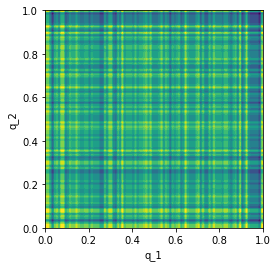

In [25]:
# Initial state: Total Ignorance!
a1, b1, b2, a2 = 1, 1, 1, 1
plot_belief_state(1,1,1,1)


# Real state:
q1 = 0.45
q2 = 0.55

In state (1,1,1,1) the best action for the Bayesian Bandits is to pull the 1 arm.


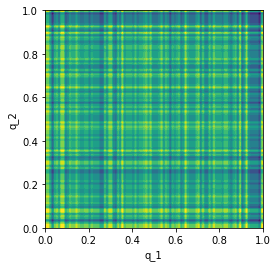

The result was win.
In state (2,1,1,1) the best action for the Bayesian Bandits is to pull the 1 arm.


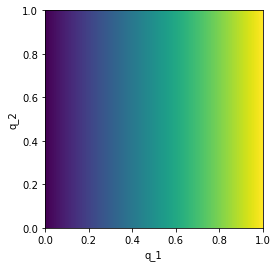

The result was win.
In state (3,1,1,1) the best action for the Bayesian Bandits is to pull the 1 arm.


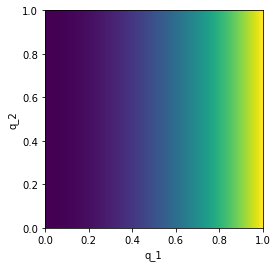

The result was fail.


In [26]:
# total ignorance.
a1, b1, b2, a2 = 1, 1, 1, 1

# Bernoulli distribution probabilities.
arm_q = [q1, q2]
# Possible outcomes.
str_result = ['fail', 'win']
# Trajectory up to T steps.
for i in range(T-1):
    
    # What is the optimal choice given by the current belief?
    arm_to_pull = best_actions[(a1,b1,a2,b2)]-1
    
    result = np.random.binomial(1,arm_q[arm_to_pull])
    
    if (i%1==0):
        print('In state ({},{},{},{}) the best action for the Bayesian Bandits is to pull the {} arm.'.format(a1,b1,a2,b2,arm_to_pull+1))
        plot_belief_state(a1,b1,a2,b2)
        print('The result was {}.'.format(str_result[result]))

    if arm_to_pull == 0:
        if result == 1:
            a1 += 1
        else:
            b1 += 1
    else:
        if result == 1:
            a2 += 1
        else:
            b2 += 1


